<a href="https://colab.research.google.com/github/VanajaT/DDoS-Attack-SDN/blob/main/PG-19MSR009_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import numpy as np
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

from sklearn.metrics import confusion_matrix

import os
print(os.listdir('/content/drive/My Drive/archive'))

['test_set', 'training_set']


In [ ]:
TRAIN_DIR='/content/drive/My Drive/archive/training_set/training_set/'
TEST_DIR='/content/drive/My Drive/archive/test_set/test_set/'


train_cat_dir=TRAIN_DIR+'cats'
train_dog_dir=TEST_DIR+'dogs'

train_cat_fnames=os.listdir(train_cat_dir)
train_dog_fnames=os.listdir(train_dog_dir)

In [ ]:
num_rows=4
num_cols=4
pic_index=0

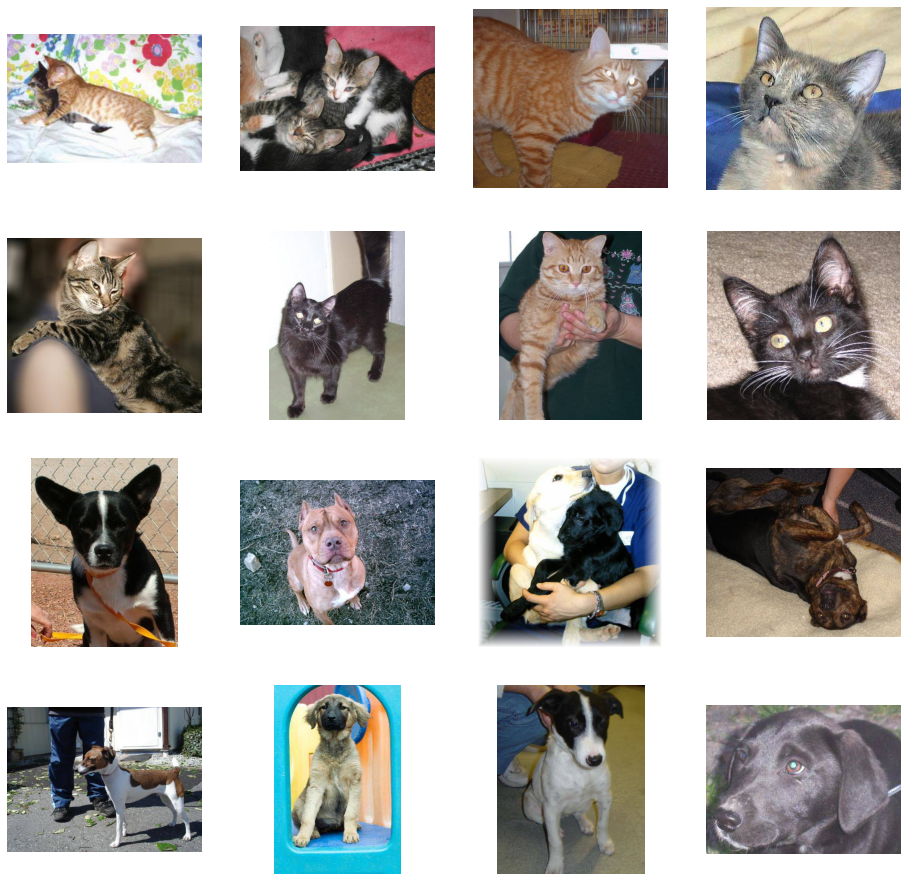

In [ ]:
fig=plt.gcf()
fig.set_size_inches(num_rows*4,num_cols*4)

pic_index+=8

next_cat_pix=[os.path.join(train_cat_dir,fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix=[os.path.join(train_dog_dir,fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i,img_path in enumerate(next_cat_pix+next_dog_pix):
    sp=plt.subplot(num_rows,num_cols,i+1)
    sp.axis('off')

    img=mpimage.imread(img_path)
    plt.imshow(img)

In [ ]:
model = Sequential();
model.add(Conv2D(32, (3, 3), input_shape=(64,64,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 128)        

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')
test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
history=model.fit(training_set,
              steps_per_epoch=50,
              epochs=10,
              validation_data=test_set)

Epoch 1/10
50/50 [==============================] - 116s 2s/step - loss: 5.9009e-08 - accuracy: 0.4950 - val_loss: 5.9634e-08 - val_accuracy: 0.5002
Epoch 2/10
50/50 [==============================] - 96s 2s/step - loss: 5.8413e-08 - accuracy: 0.4900 - val_loss: 5.9634e-08 - val_accuracy: 0.5002
Epoch 3/10
50/50 [==============================] - 78s 2s/step - loss: 6.0648e-08 - accuracy: 0.5088 - val_loss: 5.9634e-08 - val_accuracy: 0.5002
Epoch 4/10
50/50 [==============================] - 75s 2s/step - loss: 5.9977e-08 - accuracy: 0.5031 - val_loss: 5.9634e-08 - val_accuracy: 0.5002
Epoch 5/10
50/50 [==============================] - 63s 1s/step - loss: 5.6848e-08 - accuracy: 0.4769 - val_loss: 5.9634e-08 - val_accuracy: 0.5002
Epoch 6/10
50/50 [==============================] - 55s 1s/step - loss: 5.9605e-08 - accuracy: 0.5000 - val_loss: 5.9634e-08 - val_accuracy: 0.5002
Epoch 7/10
50/50 [==============================] - 72s 1s/step - loss: 6.0499e-08 - accuracy: 0.5075 - val_los

In [ ]:
print('Testing...')
score = model.evaluate(test_set)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Testing...
64/64 [==============================] - 11s 172ms/step - loss: 5.9634e-08 - accuracy: 0.5002

Test score: 5.96341109826426e-08
Test accuracy: 0.5002471804618835


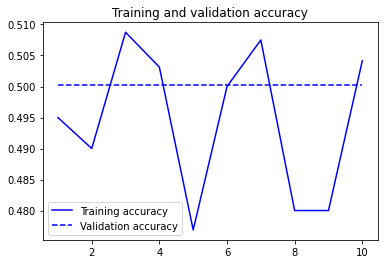

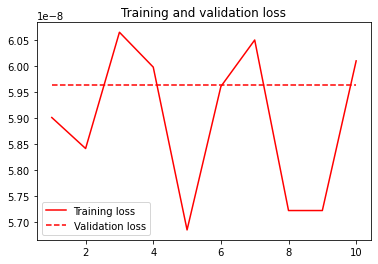

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label="Training accuracy")
plt.plot(epochs, val_acc, "b--", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "r--", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()